# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [1]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [19]:
# Instala o Pydot
!pip install pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49152/49082 [==============================] - 0s 7us/step


In [8]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [9]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [10]:
# Shape
dataset.shape

(506, 14)

In [11]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [12]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

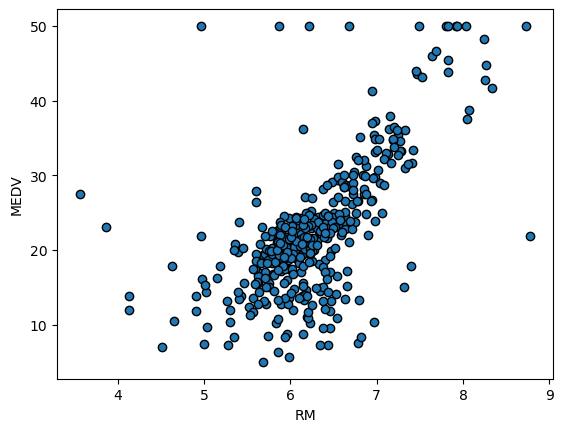

In [13]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [14]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [15]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [16]:
# Cria o modelo 
modelo = modelo_linear()

In [20]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Treinamento do Modelo

In [21]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [22]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [23]:
# Lista para as previsões
predictions_list = []

In [24]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [25]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [26]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [27]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 0s 157ms/step - loss: 357.3799 - mae: 16.9615 - mse: 357.3799 - val_loss: 433.2084 - val_mae: 18.2037 - val_mse: 433.2084
Epoch 2/4000
2/2 [==============================] - 0s 20ms/step - loss: 352.2856 - mae: 16.8166 - mse: 352.2856 - val_loss: 427.8041 - val_mae: 18.0578 - val_mse: 427.8041
Epoch 3/4000
2/2 [==============================] - 0s 19ms/step - loss: 347.3243 - mae: 16.6715 - mse: 347.3243 - val_loss: 422.4461 - val_mae: 17.9120 - val_mse: 422.4461
Epoch 4/4000
2/2 [==============================] - 0s 18ms/step - loss: 342.3835 - mae: 16.5274 - mse: 342.3835 - val_loss: 417.1436 - val_mae: 17.7665 - val_mse: 417.1436
Epoch 5/4000
2/2 [==============================] - 0s 20ms/step - loss: 337.4950 - mae: 16.3837 - mse: 337.4950 - val_loss: 411.9001 - val_mae: 17.6215 - val_mse: 411.9001
Epoch 6/4000
2/2 [==============================] - 0s 18ms/step - loss: 332.6162 - mae: 16.2411 - mse: 332.6162 - val_loss: 406.7146 

2/2 [==============================] - 0s 21ms/step - loss: 175.2189 - mae: 10.8953 - mse: 175.2189 - val_loss: 236.5455 - val_mae: 12.2323 - val_mse: 236.5455
Epoch 49/4000
2/2 [==============================] - 0s 17ms/step - loss: 172.5343 - mae: 10.7866 - mse: 172.5343 - val_loss: 233.5778 - val_mae: 12.1334 - val_mse: 233.5778
Epoch 50/4000
2/2 [==============================] - 0s 18ms/step - loss: 169.9096 - mae: 10.6793 - mse: 169.9096 - val_loss: 230.6542 - val_mae: 12.0349 - val_mse: 230.6542
Epoch 51/4000
2/2 [==============================] - 0s 21ms/step - loss: 167.2845 - mae: 10.5735 - mse: 167.2845 - val_loss: 227.7806 - val_mae: 11.9371 - val_mse: 227.7806
Epoch 52/4000
2/2 [==============================] - 0s 17ms/step - loss: 164.7346 - mae: 10.4685 - mse: 164.7346 - val_loss: 224.9502 - val_mae: 11.8398 - val_mse: 224.9502
Epoch 53/4000
2/2 [==============================] - 0s 18ms/step - loss: 162.2874 - mae: 10.3668 - mse: 162.2874 - val_loss: 222.1708 - val_mae

2/2 [==============================] - 0s 18ms/step - loss: 89.3086 - mae: 7.1135 - mse: 89.3086 - val_loss: 139.2554 - val_mae: 8.5980 - val_mse: 139.2554
Epoch 96/4000
2/2 [==============================] - 0s 19ms/step - loss: 88.2134 - mae: 7.0593 - mse: 88.2134 - val_loss: 137.9834 - val_mae: 8.5459 - val_mse: 137.9834
Epoch 97/4000
2/2 [==============================] - 0s 18ms/step - loss: 87.1447 - mae: 7.0057 - mse: 87.1447 - val_loss: 136.7336 - val_mae: 8.4940 - val_mse: 136.7336
Epoch 98/4000
2/2 [==============================] - 0s 18ms/step - loss: 86.1603 - mae: 6.9549 - mse: 86.1603 - val_loss: 135.5012 - val_mae: 8.4427 - val_mse: 135.5012
Epoch 99/4000
2/2 [==============================] - 0s 18ms/step - loss: 85.1163 - mae: 6.8999 - mse: 85.1163 - val_loss: 134.2980 - val_mae: 8.3949 - val_mse: 134.2980
Epoch 100/4000
2/2 [==============================] - 0s 19ms/step - loss: 84.1499 - mae: 6.8490 - mse: 84.1499 - val_loss: 133.1106 - val_mae: 8.3472 - val_mse: 13

2/2 [==============================] - 0s 17ms/step - loss: 59.9543 - mae: 5.4511 - mse: 59.9543 - val_loss: 101.8952 - val_mae: 7.0504 - val_mse: 101.8952
Epoch 144/4000
2/2 [==============================] - 0s 16ms/step - loss: 59.7106 - mae: 5.4375 - mse: 59.7106 - val_loss: 101.5162 - val_mae: 7.0337 - val_mse: 101.5162
Epoch 145/4000
2/2 [==============================] - 0s 18ms/step - loss: 59.4780 - mae: 5.4242 - mse: 59.4780 - val_loss: 101.1560 - val_mae: 7.0181 - val_mse: 101.1560
Epoch 146/4000
2/2 [==============================] - 0s 17ms/step - loss: 59.2369 - mae: 5.4098 - mse: 59.2369 - val_loss: 100.8157 - val_mae: 7.0052 - val_mse: 100.8157
Epoch 147/4000
2/2 [==============================] - 0s 17ms/step - loss: 59.0123 - mae: 5.3985 - mse: 59.0123 - val_loss: 100.4871 - val_mae: 6.9939 - val_mse: 100.4871
Epoch 148/4000
2/2 [==============================] - 0s 17ms/step - loss: 58.8142 - mae: 5.3868 - mse: 58.8142 - val_loss: 100.1659 - val_mae: 6.9838 - val_mse

2/2 [==============================] - 0s 19ms/step - loss: 54.9233 - mae: 5.2454 - mse: 54.9233 - val_loss: 92.7424 - val_mae: 6.7793 - val_mse: 92.7424
Epoch 192/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.9073 - mae: 5.2470 - mse: 54.9073 - val_loss: 92.6771 - val_mae: 6.7789 - val_mse: 92.6771
Epoch 193/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.8845 - mae: 5.2477 - mse: 54.8845 - val_loss: 92.6137 - val_mae: 6.7785 - val_mse: 92.6137
Epoch 194/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.8743 - mae: 5.2493 - mse: 54.8743 - val_loss: 92.5487 - val_mae: 6.7781 - val_mse: 92.5487
Epoch 195/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.8539 - mae: 5.2502 - mse: 54.8539 - val_loss: 92.4886 - val_mae: 6.7777 - val_mse: 92.4886
Epoch 196/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.8379 - mae: 5.2514 - mse: 54.8379 - val_loss: 92.4289 - val_mae: 6.7774 - val_mse: 92.4289
E

2/2 [==============================] - 0s 18ms/step - loss: 54.6473 - mae: 5.2780 - mse: 54.6473 - val_loss: 91.6222 - val_mae: 6.7686 - val_mse: 91.6222
Epoch 240/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.6446 - mae: 5.2784 - mse: 54.6446 - val_loss: 91.6149 - val_mae: 6.7684 - val_mse: 91.6149
Epoch 241/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.6407 - mae: 5.2785 - mse: 54.6407 - val_loss: 91.6128 - val_mae: 6.7683 - val_mse: 91.6128
Epoch 242/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.6383 - mae: 5.2783 - mse: 54.6383 - val_loss: 91.6094 - val_mae: 6.7682 - val_mse: 91.6094
Epoch 243/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.6370 - mae: 5.2785 - mse: 54.6370 - val_loss: 91.6049 - val_mae: 6.7680 - val_mse: 91.6049
Epoch 244/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.6333 - mae: 5.2783 - mse: 54.6333 - val_loss: 91.6075 - val_mae: 6.7679 - val_mse: 91.6075
E

2/2 [==============================] - 0s 21ms/step - loss: 54.5035 - mae: 5.2871 - mse: 54.5035 - val_loss: 91.2595 - val_mae: 6.7589 - val_mse: 91.2595
Epoch 288/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.4997 - mae: 5.2860 - mse: 54.4997 - val_loss: 91.2713 - val_mae: 6.7588 - val_mse: 91.2713
Epoch 289/4000
2/2 [==============================] - 0s 20ms/step - loss: 54.4969 - mae: 5.2846 - mse: 54.4969 - val_loss: 91.2799 - val_mae: 6.7586 - val_mse: 91.2799
Epoch 290/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.4922 - mae: 5.2839 - mse: 54.4922 - val_loss: 91.2801 - val_mae: 6.7584 - val_mse: 91.2801
Epoch 291/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.4873 - mae: 5.2836 - mse: 54.4873 - val_loss: 91.2749 - val_mae: 6.7582 - val_mse: 91.2749
Epoch 292/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.4841 - mae: 5.2835 - mse: 54.4841 - val_loss: 91.2694 - val_mae: 6.7580 - val_mse: 91.2694
E

2/2 [==============================] - 0s 19ms/step - loss: 54.2965 - mae: 5.2599 - mse: 54.2965 - val_loss: 91.3346 - val_mae: 6.7485 - val_mse: 91.3346
Epoch 336/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.2916 - mae: 5.2605 - mse: 54.2916 - val_loss: 91.3107 - val_mae: 6.7481 - val_mse: 91.3107
Epoch 337/4000
2/2 [==============================] - 0s 20ms/step - loss: 54.2874 - mae: 5.2616 - mse: 54.2874 - val_loss: 91.2959 - val_mae: 6.7477 - val_mse: 91.2959
Epoch 338/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.2796 - mae: 5.2614 - mse: 54.2796 - val_loss: 91.2948 - val_mae: 6.7474 - val_mse: 91.2948
Epoch 339/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.2758 - mae: 5.2609 - mse: 54.2758 - val_loss: 91.2932 - val_mae: 6.7471 - val_mse: 91.2932
Epoch 340/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.2707 - mae: 5.2608 - mse: 54.2707 - val_loss: 91.2794 - val_mae: 6.7467 - val_mse: 91.2794
E

2/2 [==============================] - 0s 18ms/step - loss: 54.0000 - mae: 5.2528 - mse: 54.0000 - val_loss: 90.9731 - val_mae: 6.7305 - val_mse: 90.9731
Epoch 384/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.9926 - mae: 5.2521 - mse: 53.9926 - val_loss: 90.9706 - val_mae: 6.7301 - val_mse: 90.9706
Epoch 385/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.9866 - mae: 5.2516 - mse: 53.9866 - val_loss: 90.9648 - val_mae: 6.7296 - val_mse: 90.9648
Epoch 386/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.9810 - mae: 5.2517 - mse: 53.9810 - val_loss: 90.9533 - val_mae: 6.7292 - val_mse: 90.9533
Epoch 387/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.9713 - mae: 5.2512 - mse: 53.9713 - val_loss: 90.9631 - val_mae: 6.7289 - val_mse: 90.9631
Epoch 388/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.9633 - mae: 5.2497 - mse: 53.9633 - val_loss: 90.9838 - val_mae: 6.7286 - val_mse: 90.9838
E

2/2 [==============================] - 0s 18ms/step - loss: 53.6368 - mae: 5.2392 - mse: 53.6368 - val_loss: 90.6020 - val_mae: 6.7081 - val_mse: 90.6020
Epoch 432/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.6271 - mae: 5.2381 - mse: 53.6271 - val_loss: 90.6216 - val_mae: 6.7078 - val_mse: 90.6216
Epoch 433/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.6164 - mae: 5.2359 - mse: 53.6164 - val_loss: 90.6365 - val_mae: 6.7075 - val_mse: 90.6365
Epoch 434/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.6076 - mae: 5.2342 - mse: 53.6076 - val_loss: 90.6580 - val_mae: 6.7072 - val_mse: 90.6580
Epoch 435/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.5966 - mae: 5.2313 - mse: 53.5966 - val_loss: 90.7027 - val_mae: 6.7071 - val_mse: 90.7027
Epoch 436/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.5859 - mae: 5.2277 - mse: 53.5859 - val_loss: 90.7539 - val_mae: 6.7070 - val_mse: 90.7539
E

2/2 [==============================] - 0s 17ms/step - loss: 53.2226 - mae: 5.1971 - mse: 53.2226 - val_loss: 90.6186 - val_mae: 6.6860 - val_mse: 90.6186
Epoch 480/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.2155 - mae: 5.1953 - mse: 53.2155 - val_loss: 90.6375 - val_mae: 6.6856 - val_mse: 90.6375
Epoch 481/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.2084 - mae: 5.1935 - mse: 53.2084 - val_loss: 90.6525 - val_mae: 6.6853 - val_mse: 90.6525
Epoch 482/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.2014 - mae: 5.1921 - mse: 53.2014 - val_loss: 90.6541 - val_mae: 6.6848 - val_mse: 90.6541
Epoch 483/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.1940 - mae: 5.1915 - mse: 53.1940 - val_loss: 90.6452 - val_mae: 6.6843 - val_mse: 90.6452
Epoch 484/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.1853 - mae: 5.1910 - mse: 53.1853 - val_loss: 90.6322 - val_mae: 6.6837 - val_mse: 90.6322
E

2/2 [==============================] - 0s 17ms/step - loss: 52.7998 - mae: 5.1842 - mse: 52.7998 - val_loss: 90.1311 - val_mae: 6.6589 - val_mse: 90.1311
Epoch 528/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.7836 - mae: 5.1815 - mse: 52.7836 - val_loss: 90.1355 - val_mae: 6.6585 - val_mse: 90.1355
Epoch 529/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.7786 - mae: 5.1800 - mse: 52.7786 - val_loss: 90.1376 - val_mae: 6.6580 - val_mse: 90.1376
Epoch 530/4000
2/2 [==============================] - 0s 19ms/step - loss: 52.7752 - mae: 5.1805 - mse: 52.7752 - val_loss: 90.1221 - val_mae: 6.6574 - val_mse: 90.1221
Epoch 531/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.7563 - mae: 5.1792 - mse: 52.7563 - val_loss: 90.1544 - val_mae: 6.6571 - val_mse: 90.1544
Epoch 532/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.7496 - mae: 5.1760 - mse: 52.7496 - val_loss: 90.2059 - val_mae: 6.6570 - val_mse: 90.2059
E

2/2 [==============================] - 0s 19ms/step - loss: 52.3965 - mae: 5.1578 - mse: 52.3965 - val_loss: 89.8633 - val_mae: 6.6347 - val_mse: 89.8633
Epoch 576/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.3865 - mae: 5.1572 - mse: 52.3865 - val_loss: 89.8448 - val_mae: 6.6341 - val_mse: 89.8448
Epoch 577/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.3772 - mae: 5.1576 - mse: 52.3772 - val_loss: 89.8137 - val_mae: 6.6334 - val_mse: 89.8137
Epoch 578/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.3699 - mae: 5.1592 - mse: 52.3699 - val_loss: 89.7767 - val_mae: 6.6326 - val_mse: 89.7767
Epoch 579/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.3621 - mae: 5.1604 - mse: 52.3621 - val_loss: 89.7452 - val_mae: 6.6319 - val_mse: 89.7452
Epoch 580/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.3551 - mae: 5.1620 - mse: 52.3551 - val_loss: 89.7102 - val_mae: 6.6311 - val_mse: 89.7102
E

2/2 [==============================] - 0s 18ms/step - loss: 51.9786 - mae: 5.1210 - mse: 51.9786 - val_loss: 89.7786 - val_mae: 6.6099 - val_mse: 89.7786
Epoch 624/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.9735 - mae: 5.1200 - mse: 51.9735 - val_loss: 89.7568 - val_mae: 6.6092 - val_mse: 89.7568
Epoch 625/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.9650 - mae: 5.1213 - mse: 51.9650 - val_loss: 89.6977 - val_mae: 6.6083 - val_mse: 89.6977
Epoch 626/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.9534 - mae: 5.1236 - mse: 51.9534 - val_loss: 89.6680 - val_mae: 6.6076 - val_mse: 89.6680
Epoch 627/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.9426 - mae: 5.1240 - mse: 51.9426 - val_loss: 89.6677 - val_mae: 6.6071 - val_mse: 89.6677
Epoch 628/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.9314 - mae: 5.1227 - mse: 51.9314 - val_loss: 89.6932 - val_mae: 6.6068 - val_mse: 89.6932
E

2/2 [==============================] - 0s 18ms/step - loss: 51.5617 - mae: 5.1002 - mse: 51.5617 - val_loss: 89.3877 - val_mae: 6.5830 - val_mse: 89.3877
Epoch 672/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.5510 - mae: 5.1010 - mse: 51.5510 - val_loss: 89.3385 - val_mae: 6.5821 - val_mse: 89.3385
Epoch 673/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.5410 - mae: 5.1032 - mse: 51.5410 - val_loss: 89.2781 - val_mae: 6.5812 - val_mse: 89.2781
Epoch 674/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.5344 - mae: 5.1064 - mse: 51.5344 - val_loss: 89.2158 - val_mae: 6.5802 - val_mse: 89.2158
Epoch 675/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.5307 - mae: 5.1092 - mse: 51.5307 - val_loss: 89.1689 - val_mae: 6.5793 - val_mse: 89.1689
Epoch 676/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.5219 - mae: 5.1109 - mse: 51.5219 - val_loss: 89.1496 - val_mae: 6.5786 - val_mse: 89.1496
E

2/2 [==============================] - 0s 20ms/step - loss: 51.1602 - mae: 5.0674 - mse: 51.1602 - val_loss: 89.3114 - val_mae: 6.5579 - val_mse: 89.3114
Epoch 720/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.1530 - mae: 5.0658 - mse: 51.1530 - val_loss: 89.3122 - val_mae: 6.5574 - val_mse: 89.3122
Epoch 721/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.1460 - mae: 5.0650 - mse: 51.1460 - val_loss: 89.3039 - val_mae: 6.5568 - val_mse: 89.3039
Epoch 722/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.1378 - mae: 5.0650 - mse: 51.1378 - val_loss: 89.2741 - val_mae: 6.5561 - val_mse: 89.2741
Epoch 723/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.1267 - mae: 5.0652 - mse: 51.1267 - val_loss: 89.2440 - val_mae: 6.5554 - val_mse: 89.2440
Epoch 724/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.1155 - mae: 5.0658 - mse: 51.1155 - val_loss: 89.1817 - val_mae: 6.5545 - val_mse: 89.1817
E

2/2 [==============================] - 0s 18ms/step - loss: 50.7830 - mae: 5.0620 - mse: 50.7830 - val_loss: 88.6849 - val_mae: 6.5308 - val_mse: 88.6849
Epoch 768/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.7762 - mae: 5.0626 - mse: 50.7762 - val_loss: 88.6645 - val_mae: 6.5302 - val_mse: 88.6645
Epoch 769/4000
2/2 [==============================] - 0s 19ms/step - loss: 50.7688 - mae: 5.0631 - mse: 50.7688 - val_loss: 88.6453 - val_mae: 6.5295 - val_mse: 88.6453
Epoch 770/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.7638 - mae: 5.0639 - mse: 50.7638 - val_loss: 88.6384 - val_mae: 6.5290 - val_mse: 88.6384
Epoch 771/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.7637 - mae: 5.0627 - mse: 50.7637 - val_loss: 88.6492 - val_mae: 6.5286 - val_mse: 88.6492
Epoch 772/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.7463 - mae: 5.0617 - mse: 50.7463 - val_loss: 88.6291 - val_mae: 6.5280 - val_mse: 88.6291
E

2/2 [==============================] - 0s 21ms/step - loss: 50.4207 - mae: 5.0236 - mse: 50.4207 - val_loss: 88.7580 - val_mae: 6.5083 - val_mse: 88.7580
Epoch 816/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.4089 - mae: 5.0219 - mse: 50.4089 - val_loss: 88.7486 - val_mae: 6.5077 - val_mse: 88.7486
Epoch 817/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.4019 - mae: 5.0218 - mse: 50.4019 - val_loss: 88.7337 - val_mae: 6.5071 - val_mse: 88.7337
Epoch 818/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.3930 - mae: 5.0217 - mse: 50.3930 - val_loss: 88.7256 - val_mae: 6.5066 - val_mse: 88.7256
Epoch 819/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.3854 - mae: 5.0213 - mse: 50.3854 - val_loss: 88.7189 - val_mae: 6.5061 - val_mse: 88.7189
Epoch 820/4000
2/2 [==============================] - 0s 19ms/step - loss: 50.3783 - mae: 5.0209 - mse: 50.3783 - val_loss: 88.6990 - val_mae: 6.5055 - val_mse: 88.6990
E

2/2 [==============================] - 0s 20ms/step - loss: 50.0512 - mae: 5.0139 - mse: 50.0512 - val_loss: 88.2667 - val_mae: 6.4818 - val_mse: 88.2667
Epoch 864/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.0456 - mae: 5.0122 - mse: 50.0456 - val_loss: 88.2830 - val_mae: 6.4815 - val_mse: 88.2830
Epoch 865/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.0356 - mae: 5.0109 - mse: 50.0356 - val_loss: 88.2866 - val_mae: 6.4810 - val_mse: 88.2866
Epoch 866/4000
2/2 [==============================] - 0s 19ms/step - loss: 50.0278 - mae: 5.0099 - mse: 50.0278 - val_loss: 88.3043 - val_mae: 6.4807 - val_mse: 88.3043
Epoch 867/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.0186 - mae: 5.0080 - mse: 50.0186 - val_loss: 88.3412 - val_mae: 6.4804 - val_mse: 88.3412
Epoch 868/4000
2/2 [==============================] - 0s 19ms/step - loss: 50.0158 - mae: 5.0049 - mse: 50.0158 - val_loss: 88.3861 - val_mae: 6.4803 - val_mse: 88.3861
E

2/2 [==============================] - 0s 20ms/step - loss: 49.6884 - mae: 4.9792 - mse: 49.6884 - val_loss: 88.2422 - val_mae: 6.4579 - val_mse: 88.2422
Epoch 912/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.6814 - mae: 4.9783 - mse: 49.6814 - val_loss: 88.2408 - val_mae: 6.4574 - val_mse: 88.2408
Epoch 913/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.6737 - mae: 4.9777 - mse: 49.6737 - val_loss: 88.2216 - val_mae: 6.4567 - val_mse: 88.2216
Epoch 914/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.6654 - mae: 4.9782 - mse: 49.6654 - val_loss: 88.1830 - val_mae: 6.4559 - val_mse: 88.1830
Epoch 915/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.6551 - mae: 4.9789 - mse: 49.6551 - val_loss: 88.1434 - val_mae: 6.4552 - val_mse: 88.1434
Epoch 916/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.6475 - mae: 4.9799 - mse: 49.6475 - val_loss: 88.0825 - val_mae: 6.4542 - val_mse: 88.0825
E

2/2 [==============================] - 0s 18ms/step - loss: 49.3362 - mae: 4.9618 - mse: 49.3362 - val_loss: 87.8825 - val_mae: 6.4321 - val_mse: 87.8825
Epoch 960/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.3314 - mae: 4.9623 - mse: 49.3314 - val_loss: 87.8563 - val_mae: 6.4315 - val_mse: 87.8563
Epoch 961/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.3243 - mae: 4.9635 - mse: 49.3243 - val_loss: 87.8044 - val_mae: 6.4313 - val_mse: 87.8044
Epoch 962/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.3163 - mae: 4.9653 - mse: 49.3163 - val_loss: 87.7704 - val_mae: 6.4313 - val_mse: 87.7704
Epoch 963/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.3125 - mae: 4.9666 - mse: 49.3125 - val_loss: 87.7407 - val_mae: 6.4312 - val_mse: 87.7407
Epoch 964/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.3056 - mae: 4.9673 - mse: 49.3056 - val_loss: 87.7300 - val_mae: 6.4308 - val_mse: 87.7300
E

2/2 [==============================] - 0s 17ms/step - loss: 49.0262 - mae: 4.9482 - mse: 49.0262 - val_loss: 87.5993 - val_mae: 6.4118 - val_mse: 87.5993
Epoch 1008/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.0184 - mae: 4.9456 - mse: 49.0184 - val_loss: 87.6240 - val_mae: 6.4116 - val_mse: 87.6240
Epoch 1009/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.0122 - mae: 4.9442 - mse: 49.0122 - val_loss: 87.6372 - val_mae: 6.4113 - val_mse: 87.6372
Epoch 1010/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.0064 - mae: 4.9431 - mse: 49.0064 - val_loss: 87.6435 - val_mae: 6.4110 - val_mse: 87.6435
Epoch 1011/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.9995 - mae: 4.9416 - mse: 48.9995 - val_loss: 87.6757 - val_mae: 6.4117 - val_mse: 87.6757
Epoch 1012/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.9948 - mae: 4.9394 - mse: 48.9948 - val_loss: 87.6879 - val_mae: 6.4120 - val_mse: 87.6

2/2 [==============================] - 0s 19ms/step - loss: 48.7269 - mae: 4.9308 - mse: 48.7269 - val_loss: 87.3689 - val_mae: 6.3945 - val_mse: 87.3689
Epoch 1056/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.7125 - mae: 4.9271 - mse: 48.7125 - val_loss: 87.4157 - val_mae: 6.3950 - val_mse: 87.4157
Epoch 1057/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.7091 - mae: 4.9244 - mse: 48.7091 - val_loss: 87.4782 - val_mae: 6.3962 - val_mse: 87.4782
Epoch 1058/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.6980 - mae: 4.9208 - mse: 48.6980 - val_loss: 87.5226 - val_mae: 6.3971 - val_mse: 87.5226
Epoch 1059/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.6909 - mae: 4.9179 - mse: 48.6909 - val_loss: 87.5716 - val_mae: 6.3991 - val_mse: 87.5716
Epoch 1060/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.6906 - mae: 4.9154 - mse: 48.6906 - val_loss: 87.6219 - val_mae: 6.4010 - val_mse: 87.6

2/2 [==============================] - 0s 18ms/step - loss: 48.4203 - mae: 4.9032 - mse: 48.4203 - val_loss: 87.2560 - val_mae: 6.3804 - val_mse: 87.2560
Epoch 1104/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.4128 - mae: 4.9038 - mse: 48.4128 - val_loss: 87.2353 - val_mae: 6.3796 - val_mse: 87.2353
Epoch 1105/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.4088 - mae: 4.9045 - mse: 48.4088 - val_loss: 87.2173 - val_mae: 6.3790 - val_mse: 87.2173
Epoch 1106/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.4012 - mae: 4.9041 - mse: 48.4012 - val_loss: 87.2159 - val_mae: 6.3787 - val_mse: 87.2159
Epoch 1107/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.3941 - mae: 4.9037 - mse: 48.3941 - val_loss: 87.2042 - val_mae: 6.3782 - val_mse: 87.2042
Epoch 1108/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.3888 - mae: 4.9037 - mse: 48.3888 - val_loss: 87.1918 - val_mae: 6.3776 - val_mse: 87.1

2/2 [==============================] - 0s 19ms/step - loss: 48.1141 - mae: 4.8848 - mse: 48.1141 - val_loss: 86.9904 - val_mae: 6.3624 - val_mse: 86.9904
Epoch 1152/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1064 - mae: 4.8864 - mse: 48.1064 - val_loss: 86.9199 - val_mae: 6.3605 - val_mse: 86.9199
Epoch 1153/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.1034 - mae: 4.8899 - mse: 48.1034 - val_loss: 86.8529 - val_mae: 6.3586 - val_mse: 86.8529
Epoch 1154/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1117 - mae: 4.8939 - mse: 48.1117 - val_loss: 86.7917 - val_mae: 6.3575 - val_mse: 86.7917
Epoch 1155/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.1111 - mae: 4.8965 - mse: 48.1111 - val_loss: 86.7681 - val_mae: 6.3570 - val_mse: 86.7681
Epoch 1156/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1055 - mae: 4.8971 - mse: 48.1055 - val_loss: 86.7720 - val_mae: 6.3567 - val_mse: 86.7

2/2 [==============================] - 0s 17ms/step - loss: 47.8409 - mae: 4.8739 - mse: 47.8409 - val_loss: 86.7067 - val_mae: 6.3444 - val_mse: 86.7067
Epoch 1200/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.8343 - mae: 4.8732 - mse: 47.8343 - val_loss: 86.7110 - val_mae: 6.3443 - val_mse: 86.7110
Epoch 1201/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.8273 - mae: 4.8722 - mse: 47.8273 - val_loss: 86.7215 - val_mae: 6.3443 - val_mse: 86.7215
Epoch 1202/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.8310 - mae: 4.8707 - mse: 47.8310 - val_loss: 86.7297 - val_mae: 6.3443 - val_mse: 86.7297
Epoch 1203/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.8248 - mae: 4.8709 - mse: 47.8248 - val_loss: 86.7116 - val_mae: 6.3436 - val_mse: 86.7116
Epoch 1204/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.8158 - mae: 4.8700 - mse: 47.8158 - val_loss: 86.7379 - val_mae: 6.3440 - val_mse: 86.7

2/2 [==============================] - 0s 18ms/step - loss: 47.6093 - mae: 4.8288 - mse: 47.6093 - val_loss: 87.2035 - val_mae: 6.3491 - val_mse: 87.2035
Epoch 1248/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.5997 - mae: 4.8293 - mse: 47.5997 - val_loss: 87.1450 - val_mae: 6.3466 - val_mse: 87.1450
Epoch 1249/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.5846 - mae: 4.8304 - mse: 47.5846 - val_loss: 87.0696 - val_mae: 6.3435 - val_mse: 87.0696
Epoch 1250/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.5672 - mae: 4.8322 - mse: 47.5672 - val_loss: 86.9643 - val_mae: 6.3392 - val_mse: 86.9643
Epoch 1251/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.5498 - mae: 4.8356 - mse: 47.5498 - val_loss: 86.8331 - val_mae: 6.3361 - val_mse: 86.8331
Epoch 1252/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.5493 - mae: 4.8407 - mse: 47.5493 - val_loss: 86.6971 - val_mae: 6.3328 - val_mse: 86.6

2/2 [==============================] - 0s 20ms/step - loss: 47.3316 - mae: 4.8213 - mse: 47.3316 - val_loss: 86.7643 - val_mae: 6.3248 - val_mse: 86.7643
Epoch 1296/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.3341 - mae: 4.8217 - mse: 47.3341 - val_loss: 86.7647 - val_mae: 6.3246 - val_mse: 86.7647
Epoch 1297/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.3225 - mae: 4.8202 - mse: 47.3225 - val_loss: 86.7986 - val_mae: 6.3252 - val_mse: 86.7986
Epoch 1298/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.3193 - mae: 4.8186 - mse: 47.3193 - val_loss: 86.8226 - val_mae: 6.3255 - val_mse: 86.8226
Epoch 1299/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.3193 - mae: 4.8174 - mse: 47.3193 - val_loss: 86.8395 - val_mae: 6.3256 - val_mse: 86.8395
Epoch 1300/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.3137 - mae: 4.8166 - mse: 47.3137 - val_loss: 86.8276 - val_mae: 6.3251 - val_mse: 86.8

2/2 [==============================] - 0s 17ms/step - loss: 47.0927 - mae: 4.8107 - mse: 47.0927 - val_loss: 86.4237 - val_mae: 6.3070 - val_mse: 86.4237
Epoch 1344/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.0901 - mae: 4.8133 - mse: 47.0901 - val_loss: 86.3666 - val_mae: 6.3054 - val_mse: 86.3666
Epoch 1345/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.0875 - mae: 4.8155 - mse: 47.0875 - val_loss: 86.3231 - val_mae: 6.3042 - val_mse: 86.3231
Epoch 1346/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.0842 - mae: 4.8169 - mse: 47.0842 - val_loss: 86.2909 - val_mae: 6.3032 - val_mse: 86.2909
Epoch 1347/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.0813 - mae: 4.8183 - mse: 47.0813 - val_loss: 86.2493 - val_mae: 6.3020 - val_mse: 86.2493
Epoch 1348/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.0791 - mae: 4.8200 - mse: 47.0791 - val_loss: 86.2211 - val_mae: 6.3010 - val_mse: 86.2

2/2 [==============================] - 0s 17ms/step - loss: 46.8650 - mae: 4.7987 - mse: 46.8650 - val_loss: 86.2625 - val_mae: 6.2929 - val_mse: 86.2625
Epoch 1392/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.8587 - mae: 4.7985 - mse: 46.8587 - val_loss: 86.2446 - val_mae: 6.2922 - val_mse: 86.2446
Epoch 1393/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.8603 - mae: 4.7993 - mse: 46.8603 - val_loss: 86.2289 - val_mae: 6.2917 - val_mse: 86.2289
Epoch 1394/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.8527 - mae: 4.7989 - mse: 46.8527 - val_loss: 86.2435 - val_mae: 6.2918 - val_mse: 86.2435
Epoch 1395/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.8484 - mae: 4.7982 - mse: 46.8484 - val_loss: 86.2467 - val_mae: 6.2916 - val_mse: 86.2467
Epoch 1396/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.8433 - mae: 4.7974 - mse: 46.8433 - val_loss: 86.2776 - val_mae: 6.2922 - val_mse: 86.2

2/2 [==============================] - 0s 19ms/step - loss: 46.6302 - mae: 4.7732 - mse: 46.6302 - val_loss: 86.3914 - val_mae: 6.2846 - val_mse: 86.3914
Epoch 1440/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.6238 - mae: 4.7717 - mse: 46.6238 - val_loss: 86.4406 - val_mae: 6.2855 - val_mse: 86.4406
Epoch 1441/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.6239 - mae: 4.7697 - mse: 46.6239 - val_loss: 86.4947 - val_mae: 6.2864 - val_mse: 86.4947
Epoch 1442/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.6251 - mae: 4.7688 - mse: 46.6251 - val_loss: 86.5328 - val_mae: 6.2869 - val_mse: 86.5328
Epoch 1443/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.6301 - mae: 4.7682 - mse: 46.6301 - val_loss: 86.5451 - val_mae: 6.2869 - val_mse: 86.5451
Epoch 1444/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.6292 - mae: 4.7676 - mse: 46.6292 - val_loss: 86.5164 - val_mae: 6.2861 - val_mse: 86.5

2/2 [==============================] - 0s 19ms/step - loss: 46.3977 - mae: 4.7701 - mse: 46.3977 - val_loss: 85.9427 - val_mae: 6.2636 - val_mse: 85.9427
Epoch 1488/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.3929 - mae: 4.7692 - mse: 46.3929 - val_loss: 85.9661 - val_mae: 6.2639 - val_mse: 85.9661
Epoch 1489/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.3819 - mae: 4.7671 - mse: 46.3819 - val_loss: 86.0279 - val_mae: 6.2651 - val_mse: 86.0279
Epoch 1490/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.3727 - mae: 4.7631 - mse: 46.3727 - val_loss: 86.1144 - val_mae: 6.2669 - val_mse: 86.1144
Epoch 1491/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.3749 - mae: 4.7599 - mse: 46.3749 - val_loss: 86.2146 - val_mae: 6.2688 - val_mse: 86.2146
Epoch 1492/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.3726 - mae: 4.7556 - mse: 46.3726 - val_loss: 86.2924 - val_mae: 6.2702 - val_mse: 86.2

2/2 [==============================] - 0s 18ms/step - loss: 46.1726 - mae: 4.7509 - mse: 46.1726 - val_loss: 85.8781 - val_mae: 6.2513 - val_mse: 85.8781
Epoch 1536/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1694 - mae: 4.7507 - mse: 46.1694 - val_loss: 85.8690 - val_mae: 6.2509 - val_mse: 85.8690
Epoch 1537/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.1668 - mae: 4.7509 - mse: 46.1668 - val_loss: 85.8849 - val_mae: 6.2511 - val_mse: 85.8849
Epoch 1538/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.1595 - mae: 4.7495 - mse: 46.1595 - val_loss: 85.9324 - val_mae: 6.2519 - val_mse: 85.9324
Epoch 1539/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1528 - mae: 4.7468 - mse: 46.1528 - val_loss: 85.9704 - val_mae: 6.2526 - val_mse: 85.9704
Epoch 1540/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1536 - mae: 4.7453 - mse: 46.1536 - val_loss: 86.0071 - val_mae: 6.2532 - val_mse: 86.0

2/2 [==============================] - 0s 17ms/step - loss: 45.9564 - mae: 4.7376 - mse: 45.9564 - val_loss: 85.6830 - val_mae: 6.2360 - val_mse: 85.6830
Epoch 1584/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9558 - mae: 4.7391 - mse: 45.9558 - val_loss: 85.6506 - val_mae: 6.2350 - val_mse: 85.6506
Epoch 1585/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.9569 - mae: 4.7403 - mse: 45.9569 - val_loss: 85.6308 - val_mae: 6.2342 - val_mse: 85.6308
Epoch 1586/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9565 - mae: 4.7418 - mse: 45.9565 - val_loss: 85.5844 - val_mae: 6.2329 - val_mse: 85.5844
Epoch 1587/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9465 - mae: 4.7424 - mse: 45.9465 - val_loss: 85.5802 - val_mae: 6.2325 - val_mse: 85.5802
Epoch 1588/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9497 - mae: 4.7421 - mse: 45.9497 - val_loss: 85.5783 - val_mae: 6.2323 - val_mse: 85.5

2/2 [==============================] - 0s 18ms/step - loss: 45.7532 - mae: 4.7158 - mse: 45.7532 - val_loss: 85.8630 - val_mae: 6.2294 - val_mse: 85.8630
Epoch 1632/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7658 - mae: 4.7151 - mse: 45.7658 - val_loss: 85.8938 - val_mae: 6.2299 - val_mse: 85.8938
Epoch 1633/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.7524 - mae: 4.7138 - mse: 45.7524 - val_loss: 85.8685 - val_mae: 6.2291 - val_mse: 85.8685
Epoch 1634/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7457 - mae: 4.7139 - mse: 45.7457 - val_loss: 85.8471 - val_mae: 6.2285 - val_mse: 85.8471
Epoch 1635/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.7447 - mae: 4.7147 - mse: 45.7447 - val_loss: 85.8214 - val_mae: 6.2277 - val_mse: 85.8214
Epoch 1636/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.7359 - mae: 4.7145 - mse: 45.7359 - val_loss: 85.8182 - val_mae: 6.2274 - val_mse: 85.8

2/2 [==============================] - 0s 18ms/step - loss: 45.5678 - mae: 4.7020 - mse: 45.5678 - val_loss: 85.7897 - val_mae: 6.2177 - val_mse: 85.7897
Epoch 1680/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.5665 - mae: 4.7010 - mse: 45.5665 - val_loss: 85.8163 - val_mae: 6.2180 - val_mse: 85.8163
Epoch 1681/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.5650 - mae: 4.7003 - mse: 45.5650 - val_loss: 85.8467 - val_mae: 6.2185 - val_mse: 85.8467
Epoch 1682/4000
2/2 [==============================] - 0s 21ms/step - loss: 45.5639 - mae: 4.6995 - mse: 45.5639 - val_loss: 85.8866 - val_mae: 6.2191 - val_mse: 85.8866
Epoch 1683/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.5644 - mae: 4.6988 - mse: 45.5644 - val_loss: 85.9268 - val_mae: 6.2197 - val_mse: 85.9268
Epoch 1684/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.5765 - mae: 4.6990 - mse: 45.5765 - val_loss: 85.9613 - val_mae: 6.2203 - val_mse: 85.9

2/2 [==============================] - 0s 19ms/step - loss: 45.3894 - mae: 4.7001 - mse: 45.3894 - val_loss: 85.3169 - val_mae: 6.1972 - val_mse: 85.3169
Epoch 1728/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.3879 - mae: 4.7003 - mse: 45.3879 - val_loss: 85.3052 - val_mae: 6.1967 - val_mse: 85.3052
Epoch 1729/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.3821 - mae: 4.7004 - mse: 45.3821 - val_loss: 85.2779 - val_mae: 6.1958 - val_mse: 85.2779
Epoch 1730/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.3822 - mae: 4.7015 - mse: 45.3822 - val_loss: 85.2551 - val_mae: 6.1950 - val_mse: 85.2551
Epoch 1731/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.3796 - mae: 4.7019 - mse: 45.3796 - val_loss: 85.2585 - val_mae: 6.1949 - val_mse: 85.2585
Epoch 1732/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.3729 - mae: 4.7010 - mse: 45.3729 - val_loss: 85.2875 - val_mae: 6.1954 - val_mse: 85.2

2/2 [==============================] - 0s 18ms/step - loss: 45.1941 - mae: 4.6838 - mse: 45.1941 - val_loss: 85.2906 - val_mae: 6.1858 - val_mse: 85.2906
Epoch 1776/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.1923 - mae: 4.6838 - mse: 45.1923 - val_loss: 85.3018 - val_mae: 6.1859 - val_mse: 85.3018
Epoch 1777/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.1864 - mae: 4.6830 - mse: 45.1864 - val_loss: 85.3502 - val_mae: 6.1868 - val_mse: 85.3502
Epoch 1778/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.1846 - mae: 4.6804 - mse: 45.1846 - val_loss: 85.4380 - val_mae: 6.1886 - val_mse: 85.4380
Epoch 1779/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.1902 - mae: 4.6793 - mse: 45.1902 - val_loss: 85.4917 - val_mae: 6.1896 - val_mse: 85.4917
Epoch 1780/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.1770 - mae: 4.6773 - mse: 45.1770 - val_loss: 85.5006 - val_mae: 6.1896 - val_mse: 85.5

2/2 [==============================] - 0s 18ms/step - loss: 45.0153 - mae: 4.6695 - mse: 45.0153 - val_loss: 85.2929 - val_mae: 6.1756 - val_mse: 85.2929
Epoch 1824/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.0200 - mae: 4.6687 - mse: 45.0200 - val_loss: 85.3043 - val_mae: 6.1756 - val_mse: 85.3043
Epoch 1825/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.0055 - mae: 4.6682 - mse: 45.0055 - val_loss: 85.2659 - val_mae: 6.1745 - val_mse: 85.2659
Epoch 1826/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.0039 - mae: 4.6691 - mse: 45.0039 - val_loss: 85.2208 - val_mae: 6.1733 - val_mse: 85.2208
Epoch 1827/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.0012 - mae: 4.6701 - mse: 45.0012 - val_loss: 85.1964 - val_mae: 6.1725 - val_mse: 85.1964
Epoch 1828/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.9977 - mae: 4.6701 - mse: 44.9977 - val_loss: 85.1967 - val_mae: 6.1723 - val_mse: 85.1

2/2 [==============================] - 0s 17ms/step - loss: 44.8440 - mae: 4.6627 - mse: 44.8440 - val_loss: 84.9320 - val_mae: 6.1565 - val_mse: 84.9320
Epoch 1872/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.8525 - mae: 4.6648 - mse: 44.8525 - val_loss: 84.8997 - val_mae: 6.1555 - val_mse: 84.8997
Epoch 1873/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.8483 - mae: 4.6650 - mse: 44.8483 - val_loss: 84.9106 - val_mae: 6.1556 - val_mse: 84.9106
Epoch 1874/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.8405 - mae: 4.6641 - mse: 44.8405 - val_loss: 84.9544 - val_mae: 6.1565 - val_mse: 84.9544
Epoch 1875/4000
2/2 [==============================] - 0s 20ms/step - loss: 44.8297 - mae: 4.6621 - mse: 44.8297 - val_loss: 85.0134 - val_mae: 6.1577 - val_mse: 85.0134
Epoch 1876/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.8216 - mae: 4.6600 - mse: 44.8216 - val_loss: 85.1064 - val_mae: 6.1598 - val_mse: 85.1

2/2 [==============================] - 0s 20ms/step - loss: 44.6755 - mae: 4.6447 - mse: 44.6755 - val_loss: 85.1962 - val_mae: 6.1527 - val_mse: 85.1962
Epoch 1920/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.6780 - mae: 4.6450 - mse: 44.6780 - val_loss: 85.1948 - val_mae: 6.1525 - val_mse: 85.1948
Epoch 1921/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.6680 - mae: 4.6440 - mse: 44.6680 - val_loss: 85.2287 - val_mae: 6.1530 - val_mse: 85.2287
Epoch 1922/4000
2/2 [==============================] - 0s 20ms/step - loss: 44.6668 - mae: 4.6435 - mse: 44.6668 - val_loss: 85.2517 - val_mae: 6.1533 - val_mse: 85.2517
Epoch 1923/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.6656 - mae: 4.6430 - mse: 44.6656 - val_loss: 85.2579 - val_mae: 6.1532 - val_mse: 85.2579
Epoch 1924/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.6617 - mae: 4.6427 - mse: 44.6617 - val_loss: 85.2426 - val_mae: 6.1527 - val_mse: 85.2

2/2 [==============================] - 0s 17ms/step - loss: 44.5225 - mae: 4.6329 - mse: 44.5225 - val_loss: 85.2548 - val_mae: 6.1441 - val_mse: 85.2548
Epoch 1968/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.5243 - mae: 4.6324 - mse: 44.5243 - val_loss: 85.3087 - val_mae: 6.1450 - val_mse: 85.3087
Epoch 1969/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.5263 - mae: 4.6317 - mse: 44.5263 - val_loss: 85.3458 - val_mae: 6.1456 - val_mse: 85.3458
Epoch 1970/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.5310 - mae: 4.6315 - mse: 44.5310 - val_loss: 85.3662 - val_mae: 6.1458 - val_mse: 85.3662
Epoch 1971/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.5268 - mae: 4.6311 - mse: 44.5268 - val_loss: 85.3406 - val_mae: 6.1450 - val_mse: 85.3406
Epoch 1972/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.5192 - mae: 4.6311 - mse: 44.5192 - val_loss: 85.2817 - val_mae: 6.1436 - val_mse: 85.2

2/2 [==============================] - 0s 23ms/step - loss: 44.3861 - mae: 4.6318 - mse: 44.3861 - val_loss: 84.6425 - val_mae: 6.1223 - val_mse: 84.6425
Epoch 2016/4000
2/2 [==============================] - 0s 20ms/step - loss: 44.3865 - mae: 4.6323 - mse: 44.3865 - val_loss: 84.6297 - val_mae: 6.1221 - val_mse: 84.6297
Epoch 2017/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.3849 - mae: 4.6324 - mse: 44.3849 - val_loss: 84.6341 - val_mae: 6.1219 - val_mse: 84.6341
Epoch 2018/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.3856 - mae: 4.6322 - mse: 44.3856 - val_loss: 84.6454 - val_mae: 6.1216 - val_mse: 84.6454
Epoch 2019/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.3764 - mae: 4.6315 - mse: 44.3764 - val_loss: 84.6397 - val_mae: 6.1215 - val_mse: 84.6397
Epoch 2020/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.3751 - mae: 4.6314 - mse: 44.3751 - val_loss: 84.6392 - val_mae: 6.1212 - val_mse: 84.6

2/2 [==============================] - 0s 18ms/step - loss: 44.2452 - mae: 4.6126 - mse: 44.2452 - val_loss: 85.2071 - val_mae: 6.1233 - val_mse: 85.2071
Epoch 2064/4000
2/2 [==============================] - 0s 31ms/step - loss: 44.2417 - mae: 4.6125 - mse: 44.2417 - val_loss: 85.1626 - val_mae: 6.1222 - val_mse: 85.1626
Epoch 2065/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.2438 - mae: 4.6133 - mse: 44.2438 - val_loss: 85.1335 - val_mae: 6.1214 - val_mse: 85.1335
Epoch 2066/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.2261 - mae: 4.6122 - mse: 44.2261 - val_loss: 85.1423 - val_mae: 6.1213 - val_mse: 85.1423
Epoch 2067/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.2243 - mae: 4.6119 - mse: 44.2243 - val_loss: 85.1314 - val_mae: 6.1209 - val_mse: 85.1314
Epoch 2068/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.2228 - mae: 4.6119 - mse: 44.2228 - val_loss: 85.0968 - val_mae: 6.1199 - val_mse: 85.0

2/2 [==============================] - 0s 18ms/step - loss: 44.0826 - mae: 4.6068 - mse: 44.0826 - val_loss: 84.7220 - val_mae: 6.1031 - val_mse: 84.7220
Epoch 2112/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.0795 - mae: 4.6072 - mse: 44.0795 - val_loss: 84.6889 - val_mae: 6.1025 - val_mse: 84.6889
Epoch 2113/4000
2/2 [==============================] - 0s 21ms/step - loss: 44.0772 - mae: 4.6072 - mse: 44.0772 - val_loss: 84.6497 - val_mae: 6.1023 - val_mse: 84.6497
Epoch 2114/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.0763 - mae: 4.6079 - mse: 44.0763 - val_loss: 84.6096 - val_mae: 6.1021 - val_mse: 84.6096
Epoch 2115/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.0787 - mae: 4.6084 - mse: 44.0787 - val_loss: 84.5766 - val_mae: 6.1019 - val_mse: 84.5766
Epoch 2116/4000
2/2 [==============================] - 0s 20ms/step - loss: 44.0779 - mae: 4.6092 - mse: 44.0779 - val_loss: 84.5649 - val_mae: 6.1018 - val_mse: 84.5

2/2 [==============================] - 0s 16ms/step - loss: 43.9472 - mae: 4.5959 - mse: 43.9472 - val_loss: 84.7666 - val_mae: 6.0945 - val_mse: 84.7666
Epoch 2160/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.9443 - mae: 4.5959 - mse: 43.9443 - val_loss: 84.7091 - val_mae: 6.0930 - val_mse: 84.7091
Epoch 2161/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.9403 - mae: 4.5965 - mse: 43.9403 - val_loss: 84.6618 - val_mae: 6.0928 - val_mse: 84.6618
Epoch 2162/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.9369 - mae: 4.5968 - mse: 43.9369 - val_loss: 84.6167 - val_mae: 6.0926 - val_mse: 84.6167
Epoch 2163/4000
2/2 [==============================] - 0s 17ms/step - loss: 43.9355 - mae: 4.5976 - mse: 43.9355 - val_loss: 84.5648 - val_mae: 6.0924 - val_mse: 84.5648
Epoch 2164/4000
2/2 [==============================] - 0s 21ms/step - loss: 43.9378 - mae: 4.5983 - mse: 43.9378 - val_loss: 84.5213 - val_mae: 6.0922 - val_mse: 84.5

2/2 [==============================] - 0s 23ms/step - loss: 43.8356 - mae: 4.5860 - mse: 43.8356 - val_loss: 84.8645 - val_mae: 6.0872 - val_mse: 84.8645
Epoch 2208/4000
2/2 [==============================] - 0s 45ms/step - loss: 43.8219 - mae: 4.5853 - mse: 43.8219 - val_loss: 84.8418 - val_mae: 6.0865 - val_mse: 84.8418
Epoch 2209/4000
2/2 [==============================] - 0s 19ms/step - loss: 43.8195 - mae: 4.5854 - mse: 43.8195 - val_loss: 84.8163 - val_mae: 6.0858 - val_mse: 84.8163
Epoch 2210/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.8152 - mae: 4.5855 - mse: 43.8152 - val_loss: 84.8021 - val_mae: 6.0853 - val_mse: 84.8021
Epoch 2211/4000
2/2 [==============================] - 0s 21ms/step - loss: 43.8138 - mae: 4.5855 - mse: 43.8138 - val_loss: 84.8041 - val_mae: 6.0851 - val_mse: 84.8041
Epoch 2212/4000
2/2 [==============================] - 0s 20ms/step - loss: 43.8136 - mae: 4.5854 - mse: 43.8136 - val_loss: 84.8386 - val_mae: 6.0857 - val_mse: 84.8

2/2 [==============================] - 0s 17ms/step - loss: 43.7037 - mae: 4.5763 - mse: 43.7037 - val_loss: 84.8774 - val_mae: 6.0782 - val_mse: 84.8774
Epoch 2256/4000
2/2 [==============================] - 0s 20ms/step - loss: 43.7055 - mae: 4.5761 - mse: 43.7055 - val_loss: 84.8964 - val_mae: 6.0784 - val_mse: 84.8964
Epoch 2257/4000
2/2 [==============================] - 0s 17ms/step - loss: 43.7043 - mae: 4.5759 - mse: 43.7043 - val_loss: 84.8934 - val_mae: 6.0781 - val_mse: 84.8934
Epoch 2258/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.7016 - mae: 4.5757 - mse: 43.7016 - val_loss: 84.8752 - val_mae: 6.0776 - val_mse: 84.8752
Epoch 2259/4000
2/2 [==============================] - 0s 18ms/step - loss: 43.6983 - mae: 4.5755 - mse: 43.6983 - val_loss: 84.8328 - val_mae: 6.0765 - val_mse: 84.8328
Epoch 2260/4000
2/2 [==============================] - 0s 19ms/step - loss: 43.6936 - mae: 4.5759 - mse: 43.6936 - val_loss: 84.7964 - val_mae: 6.0755 - val_mse: 84.7

In [28]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [29]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [30]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [31]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [32]:
df.head()

,MSE em Treino,MSE em Validação
0,357.379852,433.208405
1,352.285553,427.804108
2,347.324341,422.446075
3,342.383514,417.143585
4,337.494995,411.900146


<AxesSubplot:>

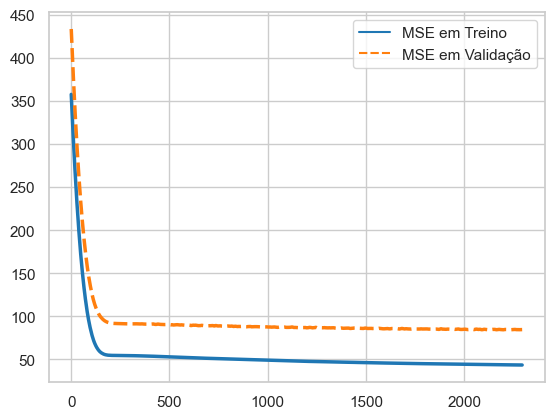

In [33]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [34]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [35]:
# Imprime as previsões
previsoes

array([20.807098, 18.281807, 23.868622, 21.231094, 20.47039 , 20.570156,
       24.49215 , 21.835918, 20.969215, 20.769684, 25.870148, 23.382267,
       21.18745 , 22.66521 , 23.20768 , 21.536625, 27.061085, 23.307446,
       29.611317, 19.853096, 20.333214, 20.913094, 19.104862, 20.807098,
       18.86792 , 23.469563, 22.814857, 14.085461, 17.065926, 35.590954,
       21.411919, 18.113453, 19.90298 , 22.74627 , 31.78743 , 24.292622,
       21.736153, 28.12732 , 25.770382, 32.473312, 27.684612, 30.820965,
       32.33614 , 17.065926, 23.014385, 23.232624, 18.244392, 23.51321 ,
       37.64237 , 35.734364, 18.038631, 35.104603, 31.32602 , 25.932503,
       23.606739, 22.74627 , 26.150734, 27.940262, 24.710384, 24.317562,
       23.126621, 18.961452, 23.369797, 22.752506, 21.012863, 20.127449,
       21.150036, 22.104034, 21.574036, 21.480507, 27.117203, 24.828857,
       10.606171, 13.798637, 16.97863 , 23.307446, 17.371456, 17.857807,
       23.344856, 21.424389, 20.133686, 25.976147, 

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>